In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

/home/khalifardy/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pro = gpd.read_file("Provinsi/Provinsi.shp")
pro.head()

,OBJECTID_1,OBJECTID,KW,WA,TA,DH,WI,LSH,LU,Ket,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,1.0,1,11,ACEH,PROVINSI,UU No. 24 Tahun 1956,None,"57.956,57",56776.153633,None,26.909354,26.909354,4.625245,"MULTIPOLYGON Z (((97.38736 1.98611 0.00000, 97..."
1,2.0,2,51,BALI,PROVINSI,None,None,"5.780,06",5586.042157,None,6.105130,6.105130,0.458572,"MULTIPOLYGON Z (((115.58135 -8.81723 0.00000, ..."
2,3.0,3,17,BENGKULU,PROVINSI,UU No. 53 Tahun 1999,None,"19.919,33",20054.424759,None,11.903307,11.903307,1.632420,"MULTIPOLYGON Z (((102.38599 -5.47132 0.00000, ..."
3,4.0,4,34,DI YOGYAKARTA,PROVINSI,None,None,"3.133,15",3172.782280,None,3.332368,3.332368,0.260161,"MULTIPOLYGON Z (((110.82650 -8.20566 0.00000, ..."
4,5.0,5,32,JAWA BARAT,PROVINSI,UU No. 11 Tahun 1950,None,"35.377,76",37064.886253,None,11.885114,11.935260,3.032786,"MULTIPOLYGON Z (((108.32318 -7.82077 0.00000, ..."


<Axes: >

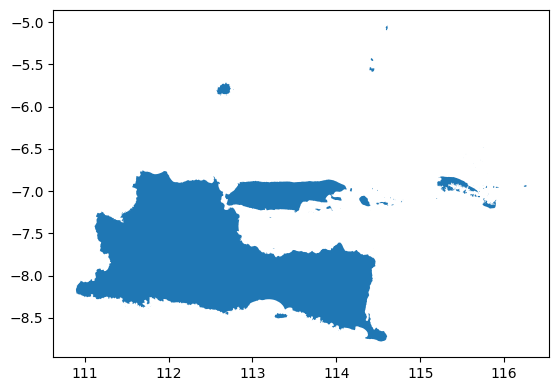

In [16]:
pro[pro.WA=="JAWA TIMUR"].plot()

In [4]:
pengeluaran = pd.read_csv("pengeluaran.csv")
pengeluaran_2010 = pengeluaran[pengeluaran.tahun==2010]

In [5]:
penge_prov = pro.merge(pengeluaran_2010, left_on="WA", right_on="nama_provinsi")
penge_prov.head()

,OBJECTID_1,OBJECTID,KW,WA,TA,DH,WI,LSH,LU,Ket,Shape_Leng,Shape_Le_1,Shape_Area,geometry,id,kode_provinsi,nama_provinsi,jumlah_pengeluaran_per_kapita,satuan,tahun
0,1.0,1,11,ACEH,PROVINSI,UU No. 24 Tahun 1956,None,"57.956,57",56776.153633,None,26.909354,26.909354,4.625245,"MULTIPOLYGON Z (((97.38736 1.98611 0.00000, 97...",1,1100,ACEH,7933.73,RIBU RUPIAH,2010
1,2.0,2,51,BALI,PROVINSI,None,None,"5.780,06",5586.042157,None,6.105130,6.105130,0.458572,"MULTIPOLYGON Z (((115.58135 -8.81723 0.00000, ...",17,5100,BALI,12073.51,RIBU RUPIAH,2010
2,3.0,3,17,BENGKULU,PROVINSI,UU No. 53 Tahun 1999,None,"19.919,33",20054.424759,None,11.903307,11.903307,1.632420,"MULTIPOLYGON Z (((102.38599 -5.47132 0.00000, ...",7,1700,BENGKULU,8458.71,RIBU RUPIAH,2010
3,5.0,5,32,JAWA BARAT,PROVINSI,UU No. 11 Tahun 1950,None,"35.377,76",37064.886253,None,11.885114,11.935260,3.032786,"MULTIPOLYGON Z (((108.32318 -7.82077 0.00000, ...",12,3200,JAWA BARAT,9173.80,RIBU RUPIAH,2010
4,6.0,6,33,JAWA TENGAH,PROVINSI,UU No. 10 Tahun 1950,None,"32.800,69",34384.914079,None,16.254201,16.254201,2.815478,"MULTIPOLYGON Z (((109.04713 -7.77719 0.00000, ...",13,3300,JAWA TENGAH,8991.96,RIBU RUPIAH,2010


In [6]:
indo = gpd.read_file("indonesia-edit.geojson")
indo.head()


,cartodb_id,country,id_1,state,name,key,slug,geometry
0,16,Indonesia,1,Aceh,Special Region of Aceh,indonesia-aceh,special-region-of-aceh,"MULTIPOLYGON (((97.97681 4.62750, 97.99611 4.6..."
1,2,Indonesia,31,Sumatera Barat,West Sumatera,indonesia-sumaterabarat,west-sumatera,"MULTIPOLYGON (((99.17167 -1.50250, 99.11528 -1..."
2,8,Indonesia,34,Yogyakarta,Special Region of Yogyakarta,indonesia-yogyakarta,special-region-of-yogyakarta,"MULTIPOLYGON (((110.70204 -8.18505, 110.83630 ..."
3,20,Indonesia,33,Sumatera Utara,North Sumatera,indonesia-sumaterautara,north-sumatera,"MULTIPOLYGON (((98.71384 3.76947, 98.72339 3.7..."
4,7,Indonesia,3,Bangka-Belitung,Bangka Belitung Islands,indonesia-bangkabelitung,bangka-belitung-islands,"MULTIPOLYGON (((105.34754 -1.84469, 105.12500 ..."


In [7]:
indo_explode = indo.explode()
indo_explode.head()

/tmp/ipykernel_40284/2579706699.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  indo_explode = indo.explode()


cartodb_id    country  id_1 state                    name  \
0 0          16  Indonesia     1  Aceh  Special Region of Aceh   
  1          16  Indonesia     1  Aceh  Special Region of Aceh   
  2          16  Indonesia     1  Aceh  Special Region of Aceh   
  3          16  Indonesia     1  Aceh  Special Region of Aceh   
  4          16  Indonesia     1  Aceh  Special Region of Aceh   

                key                    slug  \
0 0  indonesia-aceh  special-region-of-aceh   
  1  indonesia-aceh  special-region-of-aceh   
  2  indonesia-aceh  special-region-of-aceh   
  3  indonesia-aceh  special-region-of-aceh   
  4  indonesia-aceh  special-region-of-aceh   

                                              geometry  
0 0  POLYGON ((97.97681 4.62750, 97.99611 4.63806, ...  
  1  POLYGON ((95.05417 5.64861, 95.14236 5.67000, ...  
  2  POLYGON ((95.14889 5.66222, 95.11777 5.60166, ...  
  3  POLYGON ((95.07889 5.64472, 95.05055 5.62319, ...  
  4  POLYGON ((95.20389 5.58333, 95.18278 5.57417, ...

<Axes: >

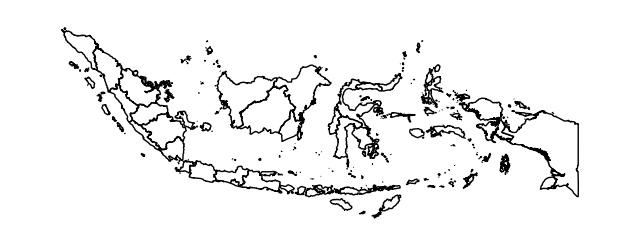

In [8]:
gplt.polyplot(indo_explode)

In [9]:
pengeluaran_2010_ = indo_explode.merge(pengeluaran_2010, left_on=indo_explode['state'].str.lower(), right_on=pengeluaran_2010['nama_provinsi'].str.lower())
pengeluaran_2010_

,key_0,cartodb_id,country,id_1,state,name,key,slug,geometry,id,kode_provinsi,nama_provinsi,jumlah_pengeluaran_per_kapita,satuan,tahun
0,aceh,16,Indonesia,1,Aceh,Special Region of Aceh,indonesia-aceh,special-region-of-aceh,"POLYGON ((97.97681 4.62750, 97.99611 4.63806, ...",1,1100,ACEH,7933.73,RIBU RUPIAH,2010
1,aceh,16,Indonesia,1,Aceh,Special Region of Aceh,indonesia-aceh,special-region-of-aceh,"POLYGON ((95.05417 5.64861, 95.14236 5.67000, ...",1,1100,ACEH,7933.73,RIBU RUPIAH,2010
2,aceh,16,Indonesia,1,Aceh,Special Region of Aceh,indonesia-aceh,special-region-of-aceh,"POLYGON ((95.14889 5.66222, 95.11777 5.60166, ...",1,1100,ACEH,7933.73,RIBU RUPIAH,2010
3,aceh,16,Indonesia,1,Aceh,Special Region of Aceh,indonesia-aceh,special-region-of-aceh,"POLYGON ((95.07889 5.64472, 95.05055 5.62319, ...",1,1100,ACEH,7933.73,RIBU RUPIAH,2010
4,aceh,16,Indonesia,1,Aceh,Special Region of Aceh,indonesia-aceh,special-region-of-aceh,"POLYGON ((95.20389 5.58333, 95.18278 5.57417, ...",1,1100,ACEH,7933.73,RIBU RUPIAH,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,sulawesi barat,17,Indonesia,26,Sulawesi Barat,West Sulawesi,indonesia-sulawesibarat,west-sulawesi,"POLYGON ((119.16658 -3.48770, 119.23617 -3.479...",30,7600,SULAWESI BARAT,8003.09,RIBU RUPIAH,2010
885,sulawesi barat,17,Indonesia,26,Sulawesi Barat,West Sulawesi,indonesia-sulawesibarat,west-sulawesi,"POLYGON ((118.89139 -2.61278, 118.87778 -2.626...",30,7600,SULAWESI BARAT,8003.09,RIBU RUPIAH,2010
886,sumatera selatan,21,Indonesia,32,Sumatera Selatan,South Sulawesi,indonesia-sumateraselatan,south-sulawesi,"POLYGON ((104.92973 -2.35417, 104.92278 -2.408...",6,1600,SUMATERA SELATAN,8536.20,RIBU RUPIAH,2010
887,sumatera selatan,21,Indonesia,32,Sumatera Selatan,South Sulawesi,indonesia-sumateraselatan,south-sulawesi,"POLYGON ((104.50166 -1.95028, 104.60055 -2.001...",6,1600,SUMATERA SELATAN,8536.20,RIBU RUPIAH,2010


In [10]:
skema = mc.Quantiles(pengeluaran_2010_["jumlah_pengeluaran_per_kapita"], k=10)
skema

Quantiles

      Interval         Count
----------------------------
[ 6250.52,  6615.07] |   120
( 6615.07,  6812.83] |    80
( 6812.83,  7361.81] |   148
( 7361.81,  7654.50] |    29
( 7654.50,  7987.73] |    83
( 7987.73,  8707.04] |    81
( 8707.04,  9301.36] |    81
( 9301.36, 10789.84] |   116
(10789.84, 12266.62] |   151
(12266.62, 12266.62] |     0

/tmp/ipykernel_40284/80671145.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pengeluaran_2010_['geometry'] = pengeluaran_2010_['geometry'].centroid


<GeoAxes: >

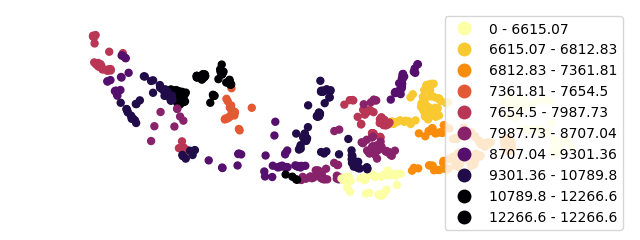

In [11]:
# Convert polygons to their centroids
pengeluaran_2010_['geometry'] = pengeluaran_2010_['geometry'].centroid

gplt.pointplot(
    pengeluaran_2010_,
    projection=gcrs.AlbersEqualArea(),
    hue="jumlah_pengeluaran_per_kapita",
    scheme=skema,
    cmap="inferno_r",
    legend=True
)